In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load dataset

In [2]:
# Load data (from a dataset in sklearn)
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Selección de features y labels.
Tomando en cuenta la estructura del dataset California Housing el dataset se dividirá de la siguiente manera:


*   **Features**: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
*   **Labels**: median_house_value_larger_than3

Se ha agregado una nueva variable binaria que indica si el valor mediano de la casa es mayor que $300,000.



In [7]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df["median_house_value"] = california_housing.target
df["median_house_value_larger_than3"] = (df["median_house_value"] > 3).astype(int)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value,median_house_value_larger_than3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


# Visualización de los datos

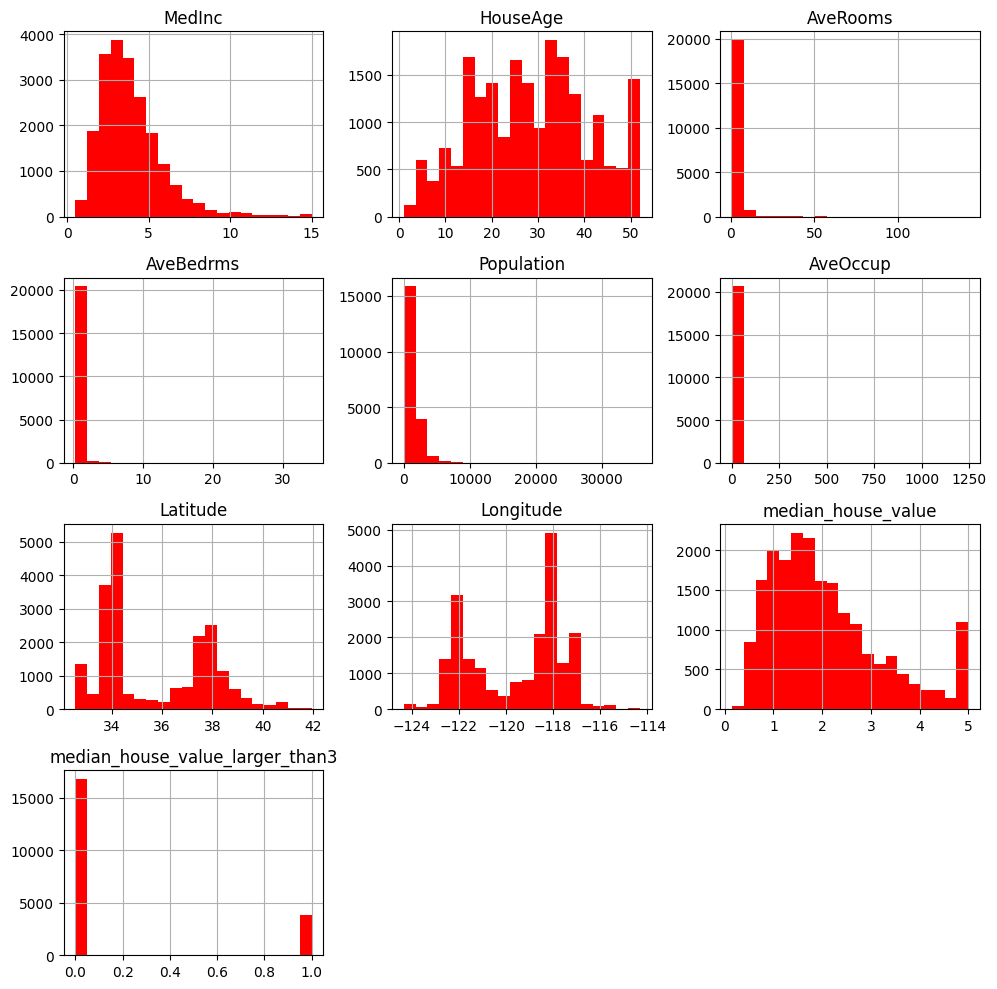

In [6]:
df.hist(bins=20, figsize=(10,10), color='red')
plt.tight_layout()
plt.show()

#Entrenamiento del modelo

In [135]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df["median_house_value_larger_than3"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [136]:
model = LogisticRegression(solver="liblinear", max_iter=1000) #class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [137]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#Evaluación del bias y varianza

In [138]:
# Determine the performance of the model with different techniques
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(f"Accuracy on test set:{round( model.score (X_test, y_test),2)}")

Accuracy on test set:0.89


In [142]:
print("Evaluación en conjunto de PRUEBA")
print(classification_report(y_test, y_pred))

Evaluación en conjunto de PRUEBA
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5041
           1       0.83      0.49      0.62      1151

    accuracy                           0.89      6192
   macro avg       0.86      0.73      0.77      6192
weighted avg       0.88      0.89      0.87      6192



#Curva ROC

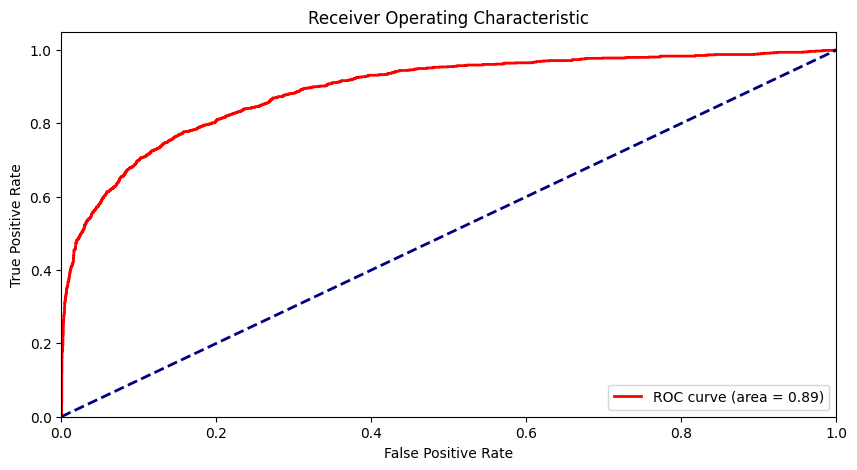

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Visualización datos de prueba

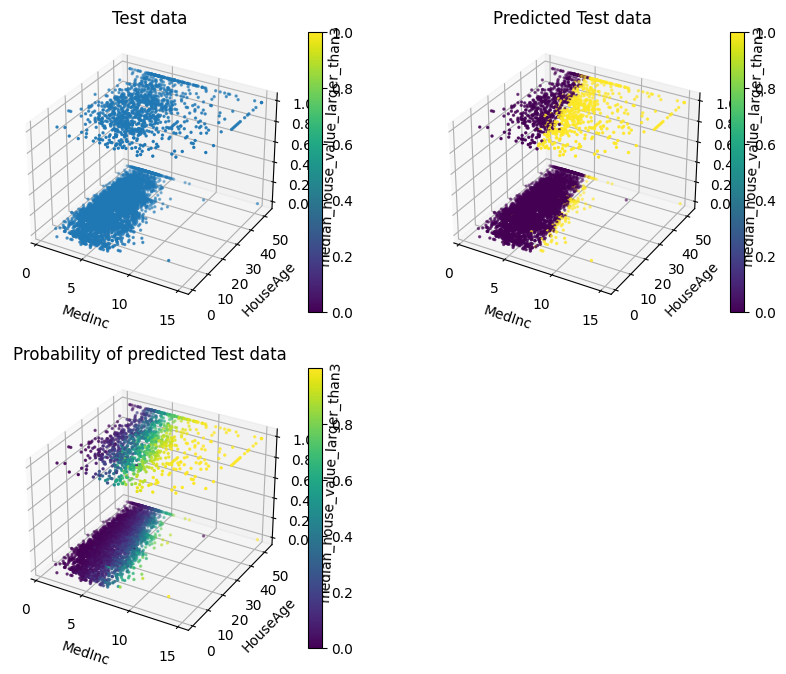

<Figure size 640x480 with 0 Axes>

In [119]:
# 3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221, projection='3d')
p = ax.scatter(X_test.MedInc, X_test.HouseAge, y_test, s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Test data")

ax = fig.add_subplot(222, projection='3d')
p = ax.scatter(X_test.MedInc, X_test.HouseAge, y_test, c=model.predict(X_test), s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Predicted Test data")

ax = fig.add_subplot(223,projection='3d')
p = ax.scatter(X_test.MedInc, X_test.HouseAge, y_test, c=model.predict_proba(X_test)[:,1], s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Probability of predicted Test data")


plt.show()
plt.tight_layout()

#Distributions

<ipython-input-126-e7966b4014a9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.predict_proba(X_test[y_test==0])[:,1], bins=20, color='red', label='0')
<ipython-input-126-e7966b4014a9>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.predict_proba(X_test[y_test==1])[:,1], bins=20

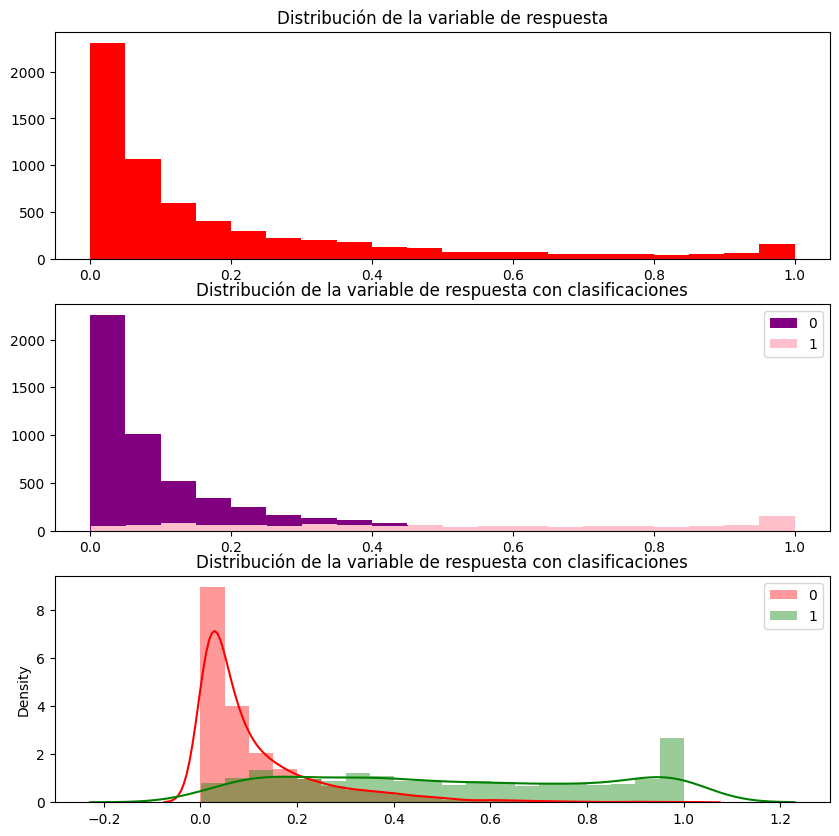

In [126]:
#sns.distplot()
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('Distribución de la variable de respuesta')
plt.hist(model.predict_proba(X_test)[:,1], bins=20 , color='red')
plt.subplot(312)
plt.title('Distribución de la variable de respuesta con clasificaciones')
plt.hist(model.predict_proba(X_test[y_test==0])[:,1], bins=20, color='purple' ,label='0')
plt.hist(model.predict_proba(X_test[y_test==1])[:,1], bins=20, color='pink', label='1')
plt.legend()
plt.subplot(313)
plt.title('Distribución de la variable de respuesta con clasificaciones')
sns.distplot(model.predict_proba(X_test[y_test==0])[:,1], bins=20, color='red', label='0')
sns.distplot(model.predict_proba(X_test[y_test==1])[:,1], bins=20, color='green', label='1')
plt.legend()
plt.show()
plt.show()

#